# K-Nearest-Neighbors

👇 Load the `houses_clean.csv` dataset located in the `data` folder, or use our URL [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_clean.csv).

In [16]:
# YOUR CODE HERE
import pandas as pd
data=pd.read_csv("./data/ML_Houses_clean.csv")
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


ℹ️ The features are already preprocessed as you did it during the Data preparation day. The dataset description can be found [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

# Default KNN

🎯 The task is to predict the price of houses (`SalePrice`) with all the features.

👇 Use cross validation to evaluate a default KNNRegressor on such a task. What is the proportion of the variance in `SalePrice` that is explained by the features? Save your answer under variable name `base_knn_score`.

<details>
<summary> 💡 Hint </summary>
    <br>
    ℹ️ The proportion of the variance in the dependent variable that is explained by the independent variables is the R2 score.
</details>

In [17]:
# YOUR CODE HERE


y=data["SalePrice"]
X=data.drop(columns="SalePrice")


In [18]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()

result=cross_validate(model,X=X,y=y,scoring="r2")
base_knn_score=result["test_score"].mean()

### ☑️ Check your code

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('default_score',
                         score = base_knn_score)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_default_score.py::TestDefault_score::test_score PASSED        [100%]

============================== 1 passed in 0.34s ===============================


💯 You can commit your code:

git add tests/default_score.pickle

git commit -m 'Completed default_score step'

git push origin master


# Scale sensitivity

KNNs and distance based algorithms can be extremely sensitive to the scale of the features. 

👇 Rescale the feature set within an **exact common range**, and save it under a variable named `X_rescaled`. Then, evaluate a model on the rescaled features and save its score under variable name `rescaled_score`.

<details>
<summary> 💡 Hint </summary>
    
`MinMaxScaler()`

</details>




In [27]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
Min_scaler=MinMaxScaler()
X_rescaled=Min_scaler.fit_transform(X)

scaled_model=cross_validate(model,X=X_rescaled,y=y,scoring="r2")
rescaled_score=scaled_model["test_score"].mean()


👉 The R2 score should have increased!

ℹ️ It is preferrable for features to be in an exact common range when modelling distance based algorithms. However, it does not always garantee a better score. It is a trial and error process.

### ☑️ Check your code

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('scale_sensitivity',
                         base_score = base_knn_score,
                         rescaled_features = X_rescaled,
                         rescaled_score = rescaled_score)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_scale_sensitivity.py::TestScale_sensitivity::test_rescaled_features PASSED [ 50%]
tests/test_scale_sensitivity.py::TestScale_sensitivity::test_score_inscrease PASSED [100%]

============================== 2 passed in 0.31s ===============================


💯 You can commit your code:

git add tests/scale_sensitivity.pickle

git commit -m 'Completed scale_sensitivity step'

git push origin master


# Optimizing $k$

👇 Fine tune the parameter K of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 2 until 25.

In [71]:
# YOUR CODE HERE

score_list=[]
for k in range(2,30):
    model=KNeighborsRegressor(n_neighbors=k)
    scaled_model=cross_validate(model,X=X_rescaled,y=y,scoring="r2")
    rescaled_score=scaled_model["test_score"].mean()
    score_list.append(rescaled_score)
    print(f"R2 score {k} is{rescaled_score}")

R2 score 2 is0.6236926810559009
R2 score 3 is0.6352616637719477
R2 score 4 is0.6422019244504337
R2 score 5 is0.6514912409729618
R2 score 6 is0.6513414327031736
R2 score 7 is0.653498368366612
R2 score 8 is0.6538878983848023
R2 score 9 is0.6554496877049389
R2 score 10 is0.6549912458402671
R2 score 11 is0.6565589531722301
R2 score 12 is0.6543285292777353
R2 score 13 is0.6561232261437094
R2 score 14 is0.6532326796218018
R2 score 15 is0.6505191006910197
R2 score 16 is0.6502936520281124
R2 score 17 is0.6481414889552937
R2 score 18 is0.6461888179147917
R2 score 19 is0.6429293202008992
R2 score 20 is0.6428265943706425
R2 score 21 is0.6408652092473098
R2 score 22 is0.6398487386174528
R2 score 23 is0.6382604964203109
R2 score 24 is0.636369812913744
R2 score 25 is0.6352805930621008
R2 score 26 is0.6357134059424238
R2 score 27 is0.6341696878065305
R2 score 28 is0.6333525766163595
R2 score 29 is0.6317006618234305


❓ Which value of K produces the best performance? Save your answer under variable name `best_k`.

<AxesSubplot:>

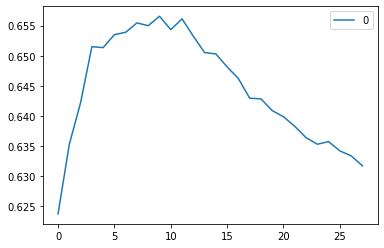

In [72]:
# YOUR CODE HERE
elbow_curve=pd.DataFrame(score_list)
elbow_curve.plot()

In [77]:
max(score_list)
best_k=11

<details>
<summary> 👉 Solution 👈</summary>
    
By looking at your graph, you should see that the score stops increasing around k = 5 and the maximum score is reached for k = 11.

</details>



❓ What is you interpretation of the poor performance of the model for values $k$ < 5?

<details>
<summary> 👉 Solution 👈</summary>
    
When K is too small, the model will tend to overfit to the training set. It will focus on too few points to be able to generalize well. Increasing K will give the model more examples to base its predictions on.

</details>



### ☑️ Check your code

In [78]:
from nbresult import ChallengeResult

result = ChallengeResult('optimal_k',
                         optimal_k = best_k)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_optimal_k.py::TestOptimal_k::test_optimal_K_around_10 PASSED  [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/optimal_k.pickle

git commit -m 'Completed optimal_k step'

git push origin master


# Overfitting a KNN 

ℹ️ When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

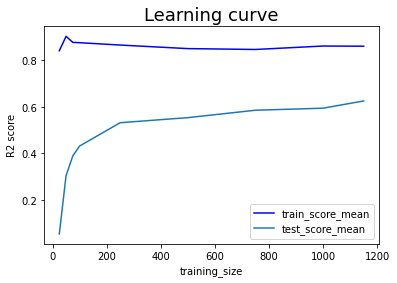

In [105]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import learning_curve

train_sizes=[25,50,75,100,250,500,750,1000,1150]

train_sizes,train_scores,test_scores=learning_curve(estimator=KNeighborsRegressor(n_neighbors=2),
                                                    X=X_rescaled,y=y,train_sizes=train_sizes,cv=5)

train_score_mean=np.mean(train_scores,axis=1)
test_score_mean=np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_score_mean,label="train_score_mean",color="b")
plt.plot(train_sizes,test_score_mean,label="test_score_mean")
plt.xlabel("training_size")
plt.ylabel("R2 score")
plt.title("Learning curve",fontsize = 18)
plt.legend()


            


👉 You should observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

# Ideal K

👇 This time, plot the learning curves for the ideal K value you found in the "Optimizing $k$" section.

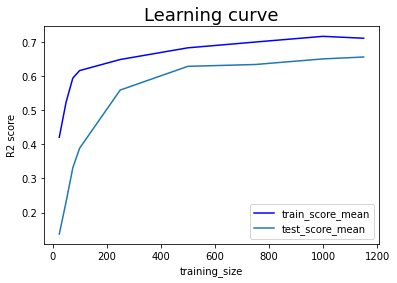

In [106]:
# YOUR CODE HERE
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import learning_curve

train_sizes=[25,50,75,100,250,500,750,1000,1150]

train_sizes,train_scores,test_scores=learning_curve(estimator=KNeighborsRegressor(n_neighbors=best_k),
                                                    X=X_rescaled,y=y,train_sizes=train_sizes,cv=5)

train_score_mean=np.mean(train_scores,axis=1)
test_score_mean=np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_score_mean,label="train_score_mean",color="b")
plt.plot(train_sizes,test_score_mean,label="test_score_mean")
plt.xlabel("training_size")
plt.ylabel("R2 score")
plt.title("Learning curve",fontsize = 18)
plt.legend()



👉 The curves should be close to converging, which indicates that the model is overfitting less and generalizing better.

ℹ️ There are two key elements to remember when modelling with KNN models:
    1. Distance algorithms are extremely sensitive to the scale of features
    2. K must be tuned: it controls the tradeoff between performance, generalization, and overfitting

❓ What is the average difference between actual price and predicted price of the optimized KNN model? Compute your answer and save it under variable name `price_error`

In [121]:
# YOUR CODE HERE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math

#MAE
model=KNeighborsRegressor(n_neighbors=best_k)
cv_result=cross_validate(model,X=X_rescaled,y=y,cv=5,
                        scoring='neg_mean_absolute_error')

price_error=cv_result["test_score"].mean()




In [122]:
price_error

-30882.88854296389

### ☑️ Check your code

In [123]:
from nbresult import ChallengeResult

result = ChallengeResult('price_error',
                         error = price_error)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_price_error.py::TestPrice_error::test_price_error_range PASSED [100%]

============================== 1 passed in 0.44s ===============================


💯 You can commit your code:

git add tests/price_error.pickle

git commit -m 'Completed price_error step'

git push origin master


# Model Selection

❓ Which of those two models would you chose to perform the task of predicting house prices:
- The KNN model you just tuned
- A Linear Regression model

Save your answer as a string under variable name `best_model` as either "KNN" or "LinearReg".

<details>
<summary> 💡 Hint </summary>
    
To chose either or, you'll have to evaluate the score of a Linear Regression on the same task and compare it to the score of the KNN. Make sure you are comparing the same metrics!!

</details>




In [133]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression

Lr_model=LinearRegression()
Lr_result=cross_validate(Lr_model,X=X_rescaled,y=y,cv=5,
                        scoring='neg_mean_absolute_error')
Lr_result["test_score"].mean()


-33586.16906310637

In [134]:
best_model="KNN"

ℹ️ When comparing either metric of both models, the KNN model should outperform the Linear Regression. This could be due to its ability to capture non-linear patterns in the data.

### ☑️ Check your code

In [136]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/03-Performance-metrics/01-KNN
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_best_model.py::TestBest_model::test_best_model PASSED         [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master


# 🏁